In [1]:

def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230408151749841563'

In [3]:
import numpy
import sympy
import torch
import matplotlib.pyplot

In [63]:
# number of points (available data)
nPerClustr = 100
blur = 1

# position of the x,y coordinates
A = [1,1]
B = [5,1]

# random x,y cordinate for one class of the dataset
a = [A[0]+numpy.random.randn(nPerClustr)*blur,A[1]+numpy.random.randn(nPerClustr)*blur]
# random x,y cordinate for the other class of the dataset
b = [B[0]+numpy.random.randn(nPerClustr)*blur,B[1]+numpy.random.randn(nPerClustr)*blur]


# labels for codinaes as 0 and 1
labels_np = numpy.vstack((numpy.zeros((nPerClustr,1)),numpy.ones((nPerClustr,1))))

# concatanate into a matrix
data_np = numpy.hstack((a,b)).T

In [64]:
data_np.shape,labels_np.shape

((200, 2), (200, 1))

Text(0.5, 1.0, 'Dataset')

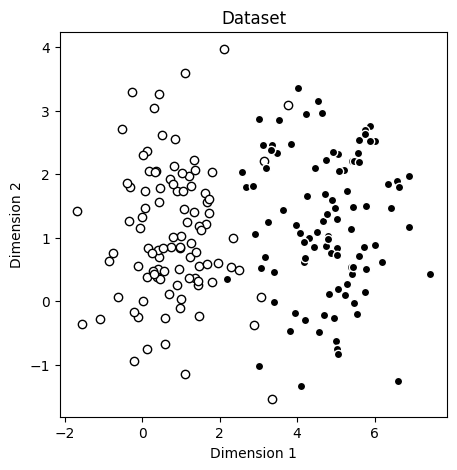

In [65]:
# convert the numpy arrays into a matrix
data = torch.tensor(data_np).float()
label = torch.tensor(labels_np).float()

# plot the data
fig = matplotlib.pyplot.figure(figsize=(5,5))
matplotlib.pyplot.plot(data[numpy.where(label==0)[0],0],data[numpy.where(label==0)[0],1],'ko',markerfacecolor='white')
matplotlib.pyplot.plot(data[numpy.where(label==1)[0],0],data[numpy.where(label==1)[0],1],'wo',markerfacecolor='black')
matplotlib.pyplot.xlabel('Dimension 1')
matplotlib.pyplot.ylabel('Dimension 2')
matplotlib.pyplot.title('Dataset')

In [66]:
## building the model
def createmodel(lr):
    nnClassifier = torch.nn.Sequential(
        torch.nn.Linear(2,1),
        torch.nn.ReLU(),
        torch.nn.Linear(1,1),
        #torch.nn.Sigmoid()   no need to compute since it's computed alonf with the loss function
        )
    # loss function
    lossfun = torch.nn.BCEWithLogitsLoss()

    # learning rate
    lr = 0.05

    # optimizer
    optimizer = torch.optim.SGD(nnClassifier.parameters(),lr=lr)

    return nnClassifier,lossfun, optimizer

In [67]:
epochs = 1000

def trainmodel(model):
    losses = torch.zeros(epochs)

    for i in range(epochs):
        pred = model(data)

        # compute loss
        loss = lossfun(pred,label)
        losses[i] = loss

        #back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # prediction
    predictions = model(data)

    totalacc = 100*torch.mean(((predictions>0)==label).float())

    return losses, predictions, totalacc

In [68]:
# test the functions 

classifier,lossfun,optimizer = createmodel(.01)

# run the function
losses,pred,totalacc = trainmodel(classifier)

In [69]:
print('Accuracy of the model is %s' %totalacc)

Accuracy of the model is tensor(96.5000)


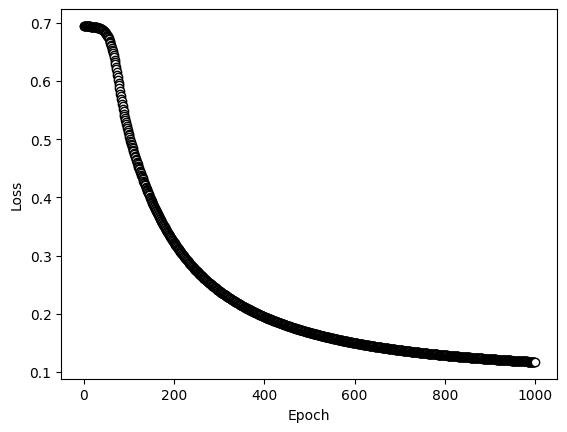

In [70]:
matplotlib.pyplot.plot(losses.detach(),'ko',markerfacecolor='white')
matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.show()

In [71]:
lrs = numpy.linspace(.001,.1,40)

accByLR = []
allLosses = numpy.zeros((len(lrs),epochs))

for i,lr in enumerate(lrs):
    nn,lossf,optimizer = createmodel(lr)
    losses,pred,totacc = trainmodel(nn)

    accByLR.append(totacc)
    allLosses[i,:]=losses.detach()

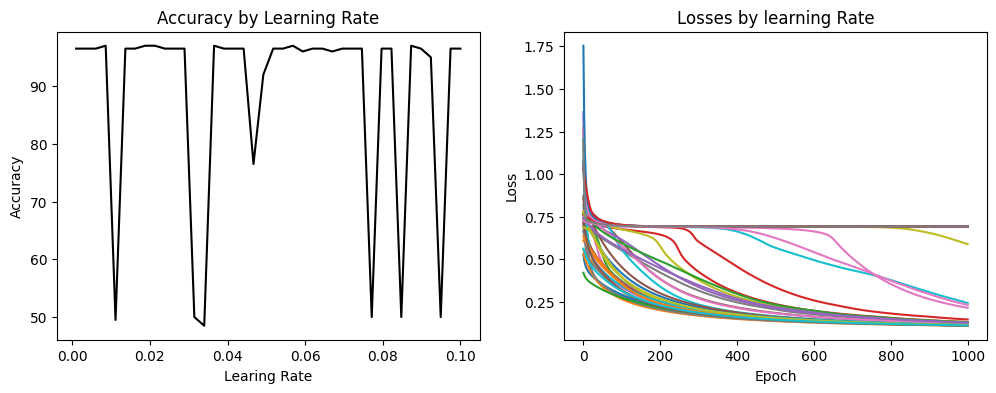

In [72]:
fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(12,4))

ax[0].plot(lrs,accByLR,'k-')
ax[0].set_xlabel('Learing Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')


ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning Rate')
matplotlib.pyplot.show()

In [74]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.8500)

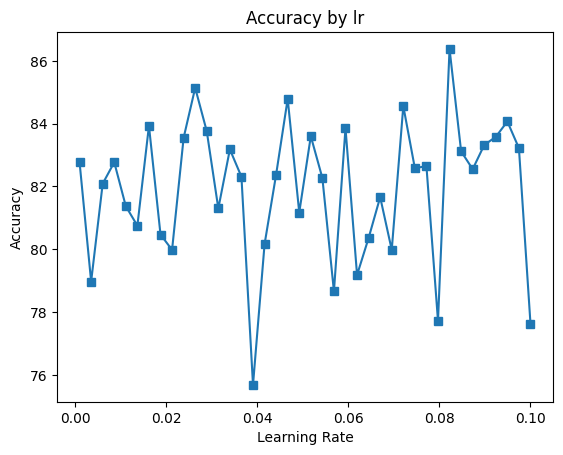

In [75]:
# meta experiments

numExps = 50

#matrix
accMeta = numpy.zeros((numExps,len(lrs)))

epochs = 500

for expi in range(numExps):
    for i,lr in enumerate(lrs):
        classifier,lossfun,optimizer = createmodel(lr)
        losses,predictions,totalacc = trainmodel(classifier)

        accMeta[expi,i]=totalacc

matplotlib.pyplot.plot(lrs,numpy.mean(accMeta,axis=0),'-s')
matplotlib.pyplot.xlabel('Learning Rate')
matplotlib.pyplot.ylabel('Accuracy')
matplotlib.pyplot.title('Accuracy by lr')
matplotlib.pyplot.show()